# Data Science  - Unit 1 Sprint 3 Module 4

## Module Project: Metrics, Bias and Variance

### Learning Objectives

* Interpret your model results using OLS and Sklearn metrics
* Define and analyze bias in your model
* Define and analyze variance in your model

## Analyzing results from diamonds

Use the seaborn dataset `diamonds` to run a linear regression model and produce the common metrics you would use to evaluate your model's accuracy. 

**Task 1** - Load the data
Load the `diamonds` dataset from the `seaborn` package. 

- Assign the value to an object called `dia`
- Make sure to import the packages you expect to use for an `ols` linear regression model. 

In [1]:
#Task 1

#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from statsmodels.formula.api import ols




# YOUR CODE HERE
dia = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')

In [2]:
# Task 1 - Tests

assert isinstance(dia, pd.DataFrame)


**Task 2** - Conduct EDA on your dataset
- Check for null values. Assign the total number of null values in your dataset to `num_null`

In [3]:
#Task 2
# YOUR CODE HERE
num_null = dia.isnull().sum().sum()


In [4]:
# Task 2 - Tests


**Task 3** - Visualize your feature distributions

- Use seaborn's `pairplot`to visualize the distributions for all your dataset's features.
- You can access the documentation [here](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
- This next task will not be autograded. 

**Task 4**

How would you describe the distribution for the `price` feature?

A: Uniform

B: Right skewed

C: Left skewed

D: Normally distributed

Specify your answer in the next code block using Answer =. For example, if the correct answer is choice B, you'll type Answer = 'B'.

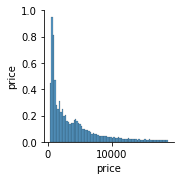

In [5]:
#Task 4

# YOUR CODE HERE
sns.pairplot(dia,kind='scatter',vars=['price'])
Answer = 'B'

In [6]:
#Task 4 - Test


**Task 5** Check for multicollinearity

- Determine the `pearson` correlations for the `x`, `y`, and `z` columns to `carat`. 
- Assign the value of the correlations to `x_corr`, `y_corr` and `z_corr` respectively. 

In [7]:
#Task 5

# YOUR CODE HERE
import scipy.stats as st
x_corr, _ = st.pearsonr(dia['x'],dia['carat'])
y_corr, _ = st.pearsonr(dia['y'],dia['carat'])
z_corr, _ = st.pearsonr(dia['z'],dia['carat'])
print(x_corr, y_corr, z_corr)

0.9750942267264217 0.9517221990129812 0.9533873805614177


In [8]:
#Task 5 - Test



**Task 6** 


Because these three columns share a great deal of correlation with the `carat` feature, it does not make sense to use them as part of our model. Drop the three columns and reassign to the `dia` dataframe. 

In [9]:
#Task 6

# YOUR CODE HERE
dia.drop(['x','y','z'],axis= 1,inplace=True)
dia.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


In [10]:
#Task 6 - Test



**Task 7** - OLS Modeling

- Use `carat` as your independent feature. 
- Use the `price` values as your dependent features. 
- Build an OLS model and review the summary report. Make sure to assign a variable called `model`

In [11]:
#Task 7

# YOUR CODE HERE
model = ols('price ~ carat',data=dia).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Thu, 05 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:44:41   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2256.3606     13.055   -172.830      0.0

In [12]:
#Task 7 - Test




**Task 8** - Predictions and Residuals 

- Create a new column that includes your model predictions for your features. Name the column `y_pred`
- Calculate the prediction residuals. Assign the values to a column named `residuals`.

In [13]:
#Task 8

# YOUR CODE HERE
dia['y_pred'] = model.predict()
dia['residuals'] = dia['price'] - dia['y_pred']
dia.head()

,carat,cut,color,clarity,depth,table,price,y_pred,residuals
0,0.23,Ideal,E,SI2,61.5,55.0,326,-472.382688,798.382688
1,0.21,Premium,E,SI1,59.8,61.0,326,-627.511200,953.511200
2,0.23,Good,E,VS1,56.9,65.0,327,-472.382688,799.382688
3,0.29,Premium,I,VS2,62.4,58.0,334,-6.997151,340.997151
4,0.31,Good,J,SI2,63.3,58.0,335,148.131362,186.868638


In [14]:
#Task 8 - Test

assert dia.shape == (53940, 9), "Have you created the two columns?"


**Task 9** - Metrics

- Determine the values for the **mean absolute error, the mean squared error** and the **root mean squared error** for your previous model. 
- Assign the values as `mae`, `mse`, and `rmse` respectively. 
- *Hint*: We discussed a few methods for this in class. You can refer to this [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html) for other metric values.

In [15]:
#Task 9

# YOUR CODE HERE
mse = metrics.mean_squared_error(dia['price'],dia['y_pred'])
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(dia['price'], dia['y_pred'])
rmse

1548.5331930613174

In [16]:
#Task 9 - Test


**Task 10** - OLS Modeling, Addtional Features

- Use the `depth`, `table`, and `carat` as your independent features. 
- Use the `price` values as your dependent features. 
- Build an OLS model and review the summary report. Make sure to assign a variable called `model`.  

In [17]:
#Task 10

# YOUR CODE HERE
model = ols('price ~ depth + carat + table',data = dia).fit()
dia['price'].shape
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 1.049e+05
Date:                Thu, 05 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:44:42   Log-Likelihood:            -4.7194e+05
No. Observations:               53940   AIC:                         9.439e+05
Df Residuals:                   53936   BIC:                         9.439e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     1.3e+04    390.918     33.264      0.0

In [18]:
#Task 10 - Test


assert len(model.params.index) == 4, "Make sure you've assigned both values."


**Task 11** - Predictions and Residuals 

- Create a new column that includes your model predictions for your features. Name the column `y_pred`
- Calculate the prediction residuals. Assign the values to a column named `residuals`.


In [19]:
#Task 11

# YOUR CODE HERE
dia['y_pred'] = model.predict()
dia['residuals'] = dia['price'] - dia['y_pred']

In [20]:
#Task 11- Test

assert dia.shape == (53940, 9), "Have you created the two columns?"


**Task 12** - Predictions and Residuals 

- Create a new column that includes your model predictions for your features. Name the column `y_pred`
- Calculate the prediction residuals. Assign the values to a column named `residuals`.


In [21]:
#Task 12

# YOUR CODE HERE
dia['y_pred'] = model.predict()
dia['residuals'] = dia['price'] - dia['y_pred']

In [22]:
# YOUR CODE HERE


**Task 13** - Metrics

- Determine the values for the **mean absolute error, the mean squared error** and the **root mean squared error** for your previous model. 
- Assign the values as `mae`, `mse`, and `rmse` respectively. 
- *Hint*: We discussed a few methods for this in class. You can refer to this [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html) for other metric values.

In [23]:
#Task 13

# YOUR CODE HERE
mse = metrics.mean_squared_error(dia['price'],dia['y_pred'])
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(dia['price'],dia['y_pred'])
rmse

1526.037612639195

In [24]:
#Task 13 - Test
